In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [2]:
# Load Iris dataset
from sklearn.datasets import load_iris
iris_dataset = load_iris()



In [3]:
# Split the dataset into features and target
X = iris_dataset['data']
y = iris_dataset['target']



In [4]:
# --- Building a Pipeline ---
# Define a pipeline with preprocessing, feature selection, and a classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('selector', SelectKBest(score_func=f_classif, k=2)),
    ('classifier', SVC())
])



In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [6]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)



Pipeline(steps=[('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(include_bias=False)),
                ('selector', SelectKBest(k=2)), ('classifier', SVC())])

In [7]:
# Predict on the test data
y_pred = pipeline.predict(X_test)



In [8]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Pipeline Test Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))



Pipeline Test Accuracy: 0.97
Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [9]:
# --- Grid Search with Pipelines ---
# Define a parameter grid for tuning
param_grid = {
    'poly__degree': [1, 2, 3],
    'selector__k': [1, 2, 3],
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}



In [10]:
# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('selector', SelectKBest(k=2)),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__kernel': ['linear', 'rbf'],
                         'poly__degree': [1, 2, 3], 'selector__k': [1, 2, 3]},
             scoring='accuracy')

In [11]:
# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")



Best parameters: {'classifier__C': 0.1, 'classifier__kernel': 'linear', 'poly__degree': 1, 'selector__k': 2}
Best cross-validation accuracy: 0.96


In [12]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)



In [13]:
# Final evaluation
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Pipeline Test Accuracy: {accuracy_best:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print("Classification Report:")
print(classification_report(y_test, y_pred_best))



Best Pipeline Test Accuracy: 0.97
Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



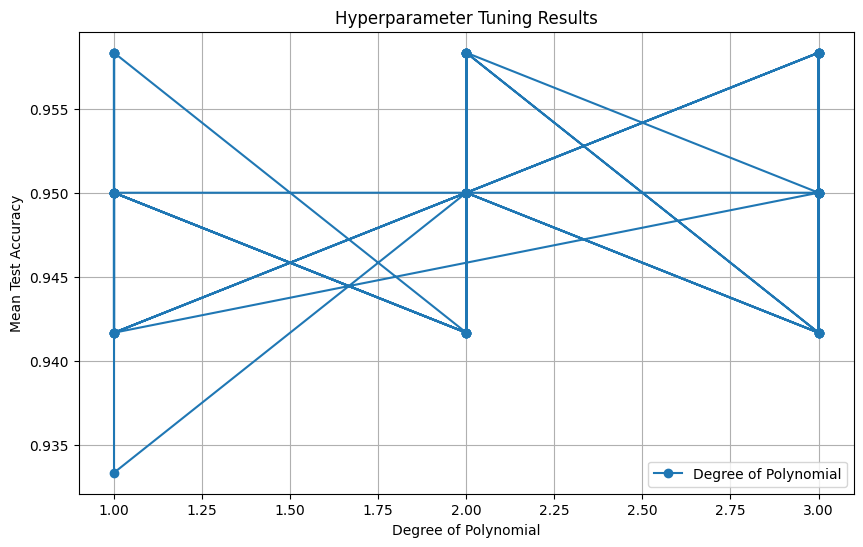

In [14]:
# --- Visualize Hyperparameter Tuning Results ---
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(results['param_poly__degree'], results['mean_test_score'], marker='o', label='Degree of Polynomial')
plt.title('Hyperparameter Tuning Results')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Test Accuracy')
plt.legend()
plt.grid()
plt.show()